In [394]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import nltk
import random
import series

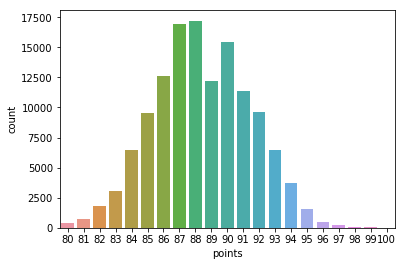

In [396]:
reviews = pd.read_csv(r"C:\Users\Caitlynne\Desktop\Spring 2018 Classes\Computational Methods for Data Analytics\HW\python\Winery\data\winemag-data-130k-v2.csv", index_col=0)
sns.countplot(reviews['points'])

In [397]:
reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [398]:
reviews.shape
df = pd.DataFrame(reviews, range(129971))

In [399]:
df['country'].replace('', np.nan, inplace=True)
df.dropna(subset=['country'], inplace=True)
df['description'].replace('', np.nan, inplace=True)
df.dropna(subset=['description'], inplace=True)
df['designation'].replace('', np.nan, inplace=True)
df.dropna(subset=['designation'], inplace=True)
df['points'].replace('', np.nan, inplace=True)
df.dropna(subset=['points'], inplace=True)
df['price'].replace('', np.nan, inplace=True)
df.dropna(subset=['price'], inplace=True)
df['province'].replace('', np.nan, inplace=True)
df.dropna(subset=['province'], inplace=True)
df['region_1'].replace('', np.nan, inplace=True)
df.dropna(subset=['region_1'], inplace=True)
#df['region_2'].replace('', np.nan, inplace=True)
#df.dropna(subset=['region_2'], inplace=True)
df['taster_name'].replace('', np.nan, inplace=True)
df.dropna(subset=['taster_name'], inplace=True)
df['taster_twitter_handle'].replace('', np.nan, inplace=True)
df.dropna(subset=['taster_twitter_handle'], inplace=True)
df['title'].replace('', np.nan, inplace=True)
df.dropna(subset=['title'], inplace=True)
df['variety'].replace('', np.nan, inplace=True)
df.dropna(subset=['variety'], inplace=True)
df['winery'].replace('', np.nan, inplace=True)
df.dropna(subset=['winery'], inplace=True)
print(df.head())

   country                                        description  \
4       US  Much like the regular bottling from 2012, this...   
5    Spain  Blackberry and raspberry aromas show a typical...   
6    Italy  Here's a bright, informal red that opens with ...   
9   France  This has great depth of flavor with its fresh ...   
10      US  Soft, supple plum envelopes an oaky structure ...   

                           designation  points  price           province  \
4   Vintner's Reserve Wild Child Block      87   65.0             Oregon   
5                         Ars In Vitro      87   15.0     Northern Spain   
6                              Belsito      87   16.0  Sicily & Sardinia   
9                          Les Natures      87   27.0             Alsace   
10                      Mountain Cuvée      87   19.0         California   

             region_1           region_2        taster_name  \
4   Willamette Valley  Willamette Valley       Paul Gregutt   
5             Navarra     

In [400]:
df1 = (df.title.str.extract('(\d+) (\w+)', expand=True))
df1.columns = ['age','b']
df.insert(1, 'age', df1['age'])
print(df.head())

   country   age                                        description  \
4       US  2012  Much like the regular bottling from 2012, this...   
5    Spain  2011  Blackberry and raspberry aromas show a typical...   
6    Italy  2013  Here's a bright, informal red that opens with ...   
9   France  2012  This has great depth of flavor with its fresh ...   
10      US  2011  Soft, supple plum envelopes an oaky structure ...   

                           designation  points  price           province  \
4   Vintner's Reserve Wild Child Block      87   65.0             Oregon   
5                         Ars In Vitro      87   15.0     Northern Spain   
6                              Belsito      87   16.0  Sicily & Sardinia   
9                          Les Natures      87   27.0             Alsace   
10                      Mountain Cuvée      87   19.0         California   

             region_1           region_2        taster_name  \
4   Willamette Valley  Willamette Valley       Paul G

In [401]:
df.shape

(52106, 14)

In [402]:
a = df['variety'].values

print(a)
print(len(a))

['Pinot Noir' 'Tempranillo-Merlot' 'Frappato' ... 'Pinot Gris'
 'Gewürztraminer' 'Gewürztraminer']
52106


In [403]:
c = df['variety'].unique()
d = sorted(c, key=str.lower)

print(d)
print(len(d))

['Abouriou', 'Aglianico', 'Airen', 'Albana', 'Albanello', 'Albariño', 'Aleatico', 'Alicante', 'Alicante Bouschet', 'Aligoté', 'Alsace white blend', 'Altesse', 'Alvarelhão', 'Apple', 'Arneis', 'Auxerrois', 'Baco Noir', 'Barbera', 'Barbera-Nebbiolo', 'Black Muscat', 'Blaufränkisch', 'Bobal', 'Bobal-Cabernet Sauvignon', 'Bonarda', 'Bordeaux-style Red Blend', 'Bordeaux-style White Blend', 'Bovale', 'Braucol', 'Cabernet', 'Cabernet Blend', 'Cabernet Franc', 'Cabernet Franc-Cabernet Sauvignon', 'Cabernet Franc-Malbec', 'Cabernet Franc-Merlot', 'Cabernet Merlot', 'Cabernet Sauvignon', 'Cabernet Sauvignon-Cabernet Franc', 'Cabernet Sauvignon-Malbec', 'Cabernet Sauvignon-Merlot', 'Cabernet Sauvignon-Merlot-Shiraz', 'Cabernet Sauvignon-Sangiovese', 'Cabernet Sauvignon-Shiraz', 'Cabernet Sauvignon-Syrah', 'Cabernet Sauvignon-Tempranillo', 'Cabernet-Malbec', 'Cabernet-Shiraz', 'Cabernet-Syrah', 'Canaiolo', 'Cannonau', 'Caprettone', 'Carcajolu', 'Carignan', 'Carignan-Grenache', 'Carignan-Syrah', 'C

In [404]:
count = {}
for word in a:
    for unique_word in c:
        if unique_word is word:
            if unique_word in count:
                count[word] += 1
            else:
                count[word] = 1
print(count)

{'Pinot Noir': 3277, 'Tempranillo-Merlot': 4, 'Frappato': 9, 'Pinot Gris': 317, 'Cabernet Sauvignon': 1555, 'Malbec': 856, 'Tempranillo Blend': 294, 'White Blend': 575, 'Merlot': 372, "Nero d'Avola": 77, 'Red Blend': 2348, 'Gamay': 290, 'Bordeaux-style White Blend': 116, 'Sangiovese': 468, 'Cabernet Franc': 249, 'Champagne Blend': 540, 'Sauvignon Blanc': 703, 'Bordeaux-style Red Blend': 1050, 'Aglianico': 64, 'Petite Sirah': 155, 'Chardonnay': 2361, 'Petit Manseng': 15, 'Rosé': 805, 'Zinfandel': 597, 'Vernaccia': 16, 'Meritage': 33, 'Viognier': 190, 'Vermentino': 43, 'Grenache Blanc': 30, 'Syrah': 950, 'Shiraz-Cabernet Sauvignon': 12, 'Rhône-style Red Blend': 520, 'Graciano': 14, 'Riesling': 612, 'Tannat-Cabernet': 10, 'G-S-M': 63, 'Verdejo': 67, 'Pinot Bianco': 25, 'Grenache': 189, 'Carignan-Grenache': 5, 'Savagnin': 5, 'Shiraz': 202, 'Sparkling Blend': 696, 'Muscat': 31, 'Muscadelle': 6, 'Shiraz-Viognier': 13, 'Nebbiolo': 657, 'Pinot Grigio': 94, 'Gewürztraminer': 234, 'Tempranillo':

In [405]:
e = sorted(count.items(), key=lambda x: x[1])
print(e)


[('Syrah-Cabernet', 1), ('Viura-Chardonnay', 1), ('Marsanne-Viognier', 1), ('Albanello', 1), ('Muskat', 1), ('Torbato', 1), ('Carcajolu', 1), ('Marselan', 1), ('Merlot-Malbec', 1), ('Edelzwicker', 1), ('Grenache Noir', 1), ('Mourvèdre-Syrah', 1), ('Clairette', 1), ('Marzemino', 1), ('Scheurebe', 1), ('Freisa', 1), ('Merlot-Tannat', 1), ('Barbera-Nebbiolo', 1), ('Chardonnay-Sauvignon', 1), ('Mazuelo', 1), ('Tinta del Pais', 1), ('Verduzzo Friulano ', 1), ('Treixadura', 1), ('Chardonnay-Sauvignon Blanc', 1), ('Viura-Verdejo', 1), ('Touriga Nacional Blend', 1), ('Tocai', 1), ("Muscat d'Alexandrie", 1), ('Tinta del Toro', 1), ('Viognier-Gewürztraminer', 1), ('Prunelard', 1), ('Malbec-Petit Verdot', 1), ('Sacy', 1), ('Ugni Blanc', 1), ('Semillon-Chardonnay', 1), ('Monica', 1), ('Sangiovese Grosso', 1), ('Veltliner', 1), ('Picolit', 1), ('Alvarelhão', 1), ('Pinot Blanc-Pinot Noir', 1), ('Pinot Gris-Gewürztraminer', 1), ('Tinto Velasco', 1), ('Nuragus', 1), ('Baco Noir', 1), ('Roussanne-Marsa

In [437]:
g = df[(df['variety'].str.startswith('Pinot Noir'))]
del g['winery']
del g['taster_twitter_handle']
del g['taster_name']
del g['region_1']
del g['region_2']
del g['province']
del g['designation']
del g['title']
del g['country']
del g['points']
del g['age']
del g['price']
print(g.head())
writer = pd.ExcelWriter('pinot_noir.xlsx')
g.to_excel(writer,'Sheet1')
writer.save()

                                           description     variety
4    Much like the regular bottling from 2012, this...  Pinot Noir
25   Oak and earth intermingle around robust aromas...  Pinot Noir
35   As with many of the Erath 2010 vineyard design...  Pinot Noir
78   Some rosés are made simply by bleeding the jui...  Pinot Noir
145  Cooked cranberry is spiced with anise, pepperc...  Pinot Noir


In [436]:
h = df[(df['variety'].str.startswith('Red Blend'))]
del h['winery']
del h['taster_twitter_handle']
del h['taster_name']
del h['region_1']
del h['region_2']
del h['province']
del h['designation']
del h['title']
del h['country']
del h['points']
del h['age']
del h['price']
print(h.head())
writer = pd.ExcelWriter('red_blend.xlsx')
h.to_excel(writer,'Sheet1')
writer.save()

                                           description    variety
28   Aromas suggest mature berry, scorched earth, a...  Red Blend
90   This blend of Sangiovese, Malbec, Cabernet Sau...  Red Blend
104  Made with 65% Sangiovese, 20% Merlot and 15% C...  Red Blend
106  A blend of Cabernet Sauvignon, Merlot, Caberne...  Red Blend
109  An easy-drinking blend of Merlot, Sangiovese a...  Red Blend


In [435]:
i = df[(df['variety'].str.startswith('Chardonnay'))]
del i['winery']
del i['taster_twitter_handle']
del i['taster_name']
del i['region_1']
del i['region_2']
del i['province']
del i['designation']
del i['title']
del i['country']
del i['points']
del i['age']
del i['price']
print(i.head())
writer = pd.ExcelWriter('chardonnay.xlsx')
i.to_excel(writer,'Sheet1')
writer.save()

                                           description     variety
77   This medium-bodied Chardonnay features aromas ...  Chardonnay
179  The impact of 50-year old vines is seen in the...  Chardonnay
205  Rich honeysuckle, marzipan and oak aromas meet...  Chardonnay
245  Not exactly a world-class white wine but at le...  Chardonnay
301  A good, clean, tart and lightly spicy all-stai...  Chardonnay


In [434]:
import openpyxl
j = df[(df['variety'].str.startswith('Cabernet Sauvignon'))]
del j['winery']
del j['taster_twitter_handle']
del j['taster_name']
del j['region_1']
del j['region_2']
del j['province']
del j['designation']
del j['title']
del j['country']
del j['points']
del j['age']
del j['price']
print(j.head())
writer = pd.ExcelWriter('cabernet_sauvignon.xlsx')
j.to_excel(writer,'Sheet1')
writer.save()

                                           description             variety
10   Soft, supple plum envelopes an oaky structure ...  Cabernet Sauvignon
60   Syrupy and dense, this wine is jammy in plum a...  Cabernet Sauvignon
71   Big oak defines this robustly dense and extrac...  Cabernet Sauvignon
73   Juicy plum, raspberry and pencil lead lead the...  Cabernet Sauvignon
111  This 100% varietal wine opens in a heady aroma...  Cabernet Sauvignon


In [430]:
frames = [g, h, i, j]

result = pd.concat(frames)
print(result.tail())

                                              description             variety
129731  This 100% varietal wine brings nuanced aromas ...  Cabernet Sauvignon
129739  Blackberry juice mixes with graphite, cedar an...  Cabernet Sauvignon
129756  In the blend are smaller percentages of Cab Fr...  Cabernet Sauvignon
129891  Chocolate, mocha and coconut notes highlight t...  Cabernet Sauvignon
129913  This is taut and dense, and requires time and ...  Cabernet Sauvignon


In [438]:
from __future__ import print_function

from collections import Counter
import itertools
import numpy as np
import re

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
def clean_str(string):
    """
    Tokenization/string cleaning.
    Original from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    
    return string.strip().lower()

def download_sentences(url):
    """
    Download sentences from specified URL. 
    
    Strip trailing newline, convert to Unicode.
    """
    
    remote_file = urlopen(url)
    return [line.decode('Latin1').strip() for line in remote_file.readlines()]
    
def load_data_and_labels():
    """
    Loads polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    """
    positive_examples = download_sentences('file:///C:/Users/Caitlynne/Desktop/Spring%202018%20Classes/Computational%20Methods%20for%20Data%20Analytics/HW/python/Winery/pinot_noir.xlsx.htm')
    negative_examples = download_sentences('file:///C:/Users/Caitlynne/Desktop/Spring%202018%20Classes/Computational%20Methods%20for%20Data%20Analytics/HW/python/Winery/chardonnay.xlsx.htm')
    
    # Tokenize
    x_text = positive_examples + negative_examples
    x_text = [clean_str(sent).split(" ") for sent in x_text]

    # Generate labels
    positive_labels = [1 for _ in positive_examples]
    negative_labels = [0 for _ in negative_examples]
    y = np.concatenate([positive_labels, negative_labels], 0)
    return x_text, y


def pad_sentences(sentences, padding_word=""):
    """
    Pads all sentences to be the length of the longest sentence.
    Returns padded sentences.
    """
    sequence_length = max(len(x) for x in sentences)
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        new_sentence = sentence + [padding_word] * num_padding
        padded_sentences.append(new_sentence)
        
    return padded_sentences

def build_vocab(sentences):
    """
    Builds a vocabulary mapping from token to index based on the sentences.
    Returns vocabulary mapping and inverse vocabulary mapping.
    """
    # Build vocabulary
    word_counts = Counter(itertools.chain(*sentences))
    
    # Mapping from index to word
    vocabulary_inv = [x[0] for x in word_counts.most_common()]
    
    # Mapping from word to index
    vocabulary = {x: i for i, x in enumerate(vocabulary_inv)}
    
    return vocabulary, vocabulary_inv

def build_input_data(sentences, labels, vocabulary):
    """
    Maps sentences and labels to vectors based on a vocabulary.
    """
    x = np.array([
            [vocabulary[word] for word in sentence]
            for sentence in sentences])
    y = np.array(labels)
    
    return x, y

"""
Loads and preprocesses data for the MR dataset.
Returns input vectors, labels, vocabulary, and inverse vocabulary.
"""
# Load and preprocess data
sentences, labels = load_data_and_labels()
sentences_padded = pad_sentences(sentences)
vocabulary, vocabulary_inv = build_vocab(sentences_padded)
x, y = build_input_data(sentences_padded, labels, vocabulary)

vocab_size = len(vocabulary)

# randomly shuffle data
np.random.seed(10)
shuffle_indices = np.random.permutation(np.arange(len(y)))
x_shuffled = x[shuffle_indices]
y_shuffled = y[shuffle_indices]

# split train/dev set
# there are a total of 10662 labeled examples to train on
x_train, x_dev = x_shuffled[:-1000], x_shuffled[-1000:]
y_train, y_dev = y_shuffled[:-1000], y_shuffled[-1000:]

sentence_size = x_train.shape[1]

print('Train/Dev split: %d/%d' % (len(y_train), len(y_dev)))
print('train shape:', x_train.shape)
print('dev shape:', x_dev.shape)
print('vocab_size', vocab_size)
print('sentence max words', sentence_size)

Train/Dev split: 303338/1000
train shape: (303338, 23)
dev shape: (1000, 23)
vocab_size 6994
sentence max words 23


In [440]:
import mxnet as mx
import sys,os

'''
Define batch size and the place holders for network inputs and outputs
'''

batch_size = 50
print('batch size', batch_size)

input_x = mx.sym.Variable('data') # placeholder for input data
input_y = mx.sym.Variable('softmax_label') # placeholder for output label


'''
Define the first network layer (embedding)
'''

# create embedding layer to learn representation of words in a lower dimensional subspace (much like word2vec)
num_embed = 300 # dimensions to embed words into
print('embedding dimensions', num_embed)

embed_layer = mx.sym.Embedding(data=input_x, input_dim=vocab_size, output_dim=num_embed, name='vocab_embed')

# reshape embedded data for next layer
conv_input = mx.sym.Reshape(data=embed_layer, target_shape=(batch_size, 1, sentence_size, num_embed))


batch size 50
embedding dimensions 300


In [441]:
# create convolution + (max) pooling layer for each filter operation
filter_list=[3, 4, 5] # the size of filters to use
print('convolution filters', filter_list)

num_filter=100
pooled_outputs = []
for filter_size in filter_list:
    convi = mx.sym.Convolution(data=conv_input, kernel=(filter_size, num_embed), num_filter=num_filter)
    relui = mx.sym.Activation(data=convi, act_type='relu')
    pooli = mx.sym.Pooling(data=relui, pool_type='max', kernel=(sentence_size - filter_size + 1, 1), stride=(1, 1))
    pooled_outputs.append(pooli)

# combine all pooled outputs
total_filters = num_filter * len(filter_list)
concat = mx.sym.Concat(*pooled_outputs, dim=1)

# reshape for next layer
h_pool = mx.sym.Reshape(data=concat, target_shape=(batch_size, total_filters))

convolution filters [3, 4, 5]


In [443]:
# dropout layer
dropout = 0.5
print('dropout probability', dropout)

if dropout > 0.0:
    h_drop = mx.sym.Dropout(data=h_pool, p=dropout)
else:
    h_drop = h_pool

dropout probability 0.5


In [449]:
# fully connected layer
num_label = 2

cls_weight = mx.sym.Variable('cls_weight')
cls_bias = mx.sym.Variable('cls_bias')

fc = mx.sym.FullyConnected(data=h_drop, weight=cls_weight, bias=cls_bias, num_hidden=num_label)

# softmax output
sm = mx.sym.SoftmaxOutput(data=fc, label=input_y, name='softmax')

# set CNN pointer to the "back" of the network
cnn = sm

In [450]:
del dict

from collections import namedtuple
import math
import time

# Define the structure of our CNN Model (as a named tuple)
CNNModel = namedtuple("CNNModel", ['cnn_exec', 'symbol', 'data', 'label', 'param_blocks'])

# Define what device to train/test on
#ctx = mx.gpu(0)
# If you have no GPU on your machine change this to
ctx = mx.cpu(0)

arg_names = cnn.list_arguments()

input_shapes = {}
input_shapes['data'] = (batch_size, sentence_size)

arg_shape, out_shape, aux_shape = cnn.infer_shape(**input_shapes)
arg_arrays = [mx.nd.zeros(s, ctx) for s in arg_shape]
args_grad = {}
for shape, name in zip(arg_shape, arg_names):
    if name in ['softmax_label', 'data']: # input, output
        continue
    args_grad[name] = mx.nd.zeros(shape, ctx)

cnn_exec = cnn.bind(ctx=ctx, args=arg_arrays, args_grad=args_grad, grad_req='add')

param_blocks = []
arg_dict = dict(zip(arg_names, cnn_exec.arg_arrays))
initializer = mx.initializer.Uniform(0.1)
for i, name in enumerate(arg_names):
    if name in ['softmax_label', 'data']: # input, output
        continue
    initializer(mx.init.InitDesc(name), arg_dict[name])

    param_blocks.append( (i, arg_dict[name], args_grad[name], name) )

data = cnn_exec.arg_dict['data']
label = cnn_exec.arg_dict['softmax_label']

cnn_model= CNNModel(cnn_exec=cnn_exec, symbol=cnn, data=data, label=label, param_blocks=param_blocks)

In [451]:
'''
Train the cnn_model using back prop
'''

optimizer = 'rmsprop'
max_grad_norm = 5.0
learning_rate = 0.0005
epoch = 50

print('optimizer', optimizer)
print('maximum gradient', max_grad_norm)
print('learning rate (step size)', learning_rate)
print('epochs to train for', epoch)

# create optimizer
opt = mx.optimizer.create(optimizer)
opt.lr = learning_rate

updater = mx.optimizer.get_updater(opt)

# For each training epoch
for iteration in range(epoch):
    tic = time.time()
    num_correct = 0
    num_total = 0
    
        # Over each batch of training data
    for begin in range(0, x_train.shape[0], batch_size):
        batchX = x_train[begin:begin+batch_size]
        batchY = y_train[begin:begin+batch_size]
        if batchX.shape[0] != batch_size:
            continue

        cnn_model.data[:] = batchX
        cnn_model.label[:] = batchY

        # forward
        cnn_model.cnn_exec.forward(is_train=True)

        # backward
        cnn_model.cnn_exec.backward()

        # eval on training data
        num_correct += sum(batchY == np.argmax(cnn_model.cnn_exec.outputs[0].asnumpy(), axis=1))
        num_total += len(batchY)

        # update weights
        norm = 0
        for idx, weight, grad, name in cnn_model.param_blocks:
            grad /= batch_size
            l2_norm = mx.nd.norm(grad).asscalar()
            norm += l2_norm * l2_norm
        norm = math.sqrt(norm)
        for idx, weight, grad, name in cnn_model.param_blocks:
            if norm > max_grad_norm:
                grad *= (max_grad_norm / norm)

            updater(idx, grad, weight)

            # reset gradient to zero
            grad[:] = 0.0

    # Decay learning rate for this epoch to ensure we are not "overshooting" optima
    if iteration % 50 == 0 and iteration > 0:
        opt.lr *= 0.5
        print('reset learning rate to %g' % opt.lr)

    # End of training loop for this epoch
    toc = time.time()
    train_time = toc - tic
    train_acc = num_correct * 100 / float(num_total)

    # Saving checkpoint to disk
    if (iteration + 1) % 10 == 0:
        prefix = 'cnn'
        cnn_model.symbol.save('./%s-symbol.json' % prefix)
        save_dict = {('arg:%s' % k) : v  for k, v in cnn_model.cnn_exec.arg_dict.items()}
        save_dict.update({('aux:%s' % k) : v for k, v in cnn_model.cnn_exec.aux_dict.items()})
        param_name = './%s-%04d.params' % (prefix, iteration)
        mx.nd.save(param_name, save_dict)
        print('Saved checkpoint to %s' % param_name)
    # Evaluate model after this epoch on dev (test) set
    num_correct = 0
    num_total = 0

    # For each test batch
    for begin in range(0, x_dev.shape[0], batch_size):
        batchX = x_dev[begin:begin+batch_size]
        batchY = y_dev[begin:begin+batch_size]

        if batchX.shape[0] != batch_size:
            continue

        cnn_model.data[:] = batchX
        cnn_model.cnn_exec.forward(is_train=False)

        num_correct += sum(batchY == np.argmax(cnn_model.cnn_exec.outputs[0].asnumpy(), axis=1))
        num_total += len(batchY)

    dev_acc = num_correct * 100 / float(num_total)
    print('Iter [%d] Train: Time: %.3fs, Training Accuracy: %.3f \
            --- Dev Accuracy thus far: %.3f' % (iteration, train_time, train_acc, dev_acc))      


optimizer rmsprop
maximum gradient 5.0
learning rate (step size) 0.0005
epochs to train for 50


In [139]:
del result['title']
del result['variety']
del result['winery']
del result['taster_twitter_handle']
del result['taster_name']
del result['region_1']
del result['region_2']
del result['province']
del result['designation']
del result['description']
del result['country']

print(result.head())

      age  points  price
4    2012      87   65.0
25   2011      87   69.0
35   2010      86   50.0
78   2015      86   25.0
145  2013      91   64.0


In [159]:
def clean_dataset(df: object) -> object:
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(result)

x = result[['price', 'age']]
y = result['points']
x_train, x_test, y_train, y_test = train_test_split(x,y)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predictions = regressor.predict(x_test)
print(regressor.score(x_test, y_test))

quadratic_featurizer = PolynomialFeatures(degree=6)
x_train_quadratic = quadratic_featurizer.fit_transform(x_train)
x_test_quadratic = quadratic_featurizer.fit_transform(x_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(x_train_quadratic, y_train)
yy_predictions = regressor_quadratic.predict(x_test_quadratic)
print(regressor_quadratic.score(x_test_quadratic, y_test))

#you can add in mean score after cross validations to get a more accurate value

0.21958934532344876
0.3957717882779927
